In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from prophet import Prophet

In [166]:
def dateparse(x):
    return pd.to_datetime(x, infer_datetime_format=True, unit='s',utc=True)

In [167]:
df1 = pd.read_excel("iot_telemetry_data.xlsx",date_parser=dateparse,index_col=['ts'])
df2 = pd.read_excel("iot_telemetry_data.xlsx")

In [168]:
df

,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int
ts,,,,,,,,,,
2020-07-12 00:01:39.589145899+00:00,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,350.744,1,0
2020-07-12 00:09:45.454875469+00:00,b8:27:eb:bf:9d:51,0.004976,49.900000,False,0.007673,False,0.020475,324.500,0,0
2020-07-12 00:09:49.141025543+00:00,b8:27:eb:bf:9d:51,0.004947,49.900000,False,0.007641,False,0.020384,324.500,0,0
2020-07-12 00:09:52.829939365+00:00,b8:27:eb:bf:9d:51,0.004972,49.700000,False,0.007668,False,0.020461,324.500,0,0
2020-07-12 00:09:56.515793324+00:00,b8:27:eb:bf:9d:51,0.004980,49.700000,False,0.007678,False,0.020489,324.500,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-07-13 23:43:31.796826363+00:00,00:0f:00:70:91:0a,0.004325,73.699997,False,0.006934,False,0.018374,304.088,0,0
2020-07-13 23:43:35.613341808+00:00,00:0f:00:70:91:0a,0.004167,73.699997,False,0.006749,False,0.017851,304.088,0,0
2020-07-13 23:43:39.841733694+00:00,1c:bf:ce:15:ec:4d,0.004089,58.099998,True,0.006657,False,0.017592,344.912,1,0


In [169]:
df = df.sort_values(by='ts', ascending=True)
df['temp'] = (df['temp'] * 1.8) + 32

In [170]:
df = df.loc[df['temp'] > df.groupby('device').temp.transform(lambda x: x.quantile(0.01))]
df = df.loc[df['temp'] < df.groupby('device').temp.transform(lambda x: x.quantile(0.99))]

df = df.loc[df['humidity'] > df.groupby('device').humidity.transform(lambda x: x.quantile(0.01))]
df = df.loc[df['humidity'] < df.groupby('device').humidity.transform(lambda x: x.quantile(0.99))]

groups = df.groupby('device')

In [171]:
df

,device,co,humidity,light,lpg,motion,smoke,temp,light_int,motion_int
ts,,,,,,,,,,
2020-07-12 00:01:39.589145899+00:00,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,663.33920,1,0
2020-07-12 00:10:22.316413641+00:00,b8:27:eb:bf:9d:51,0.004973,49.600000,False,0.007670,False,0.020466,615.05024,0,0
2020-07-12 00:10:33.374454260+00:00,b8:27:eb:bf:9d:51,0.004977,49.500000,False,0.007675,False,0.020479,615.05024,0,0
2020-07-12 00:10:40.746451139+00:00,b8:27:eb:bf:9d:51,0.004992,49.400000,False,0.007691,False,0.020525,615.05024,0,0
2020-07-12 00:10:44.432476997+00:00,b8:27:eb:bf:9d:51,0.004986,49.400000,False,0.007684,False,0.020507,615.05024,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-07-13 23:43:31.796826363+00:00,00:0f:00:70:91:0a,0.004325,73.699997,False,0.006934,False,0.018374,579.35840,0,0
2020-07-13 23:43:35.613341808+00:00,00:0f:00:70:91:0a,0.004167,73.699997,False,0.006749,False,0.017851,579.35840,0,0
2020-07-13 23:43:39.841733694+00:00,1c:bf:ce:15:ec:4d,0.004089,58.099998,True,0.006657,False,0.017592,652.84160,1,0


In [172]:
print('Temperature : {:.2f} to {:.2f}'.format(df['temp'].min(),df['temp'].max()))
print('Time        : {:%Y-%m-%d %H:%M:%S %Z} to {:%Y-%m-%d %H:%M:%S %Z}'.format(df.index[1],df.index[-1]))
print('Humidity    : {:.2f} % to {:.2f} %'.format(df['humidity'].min(),df['humidity'].max()))

Temperature : 579.36 to 673.84
Time        : 2020-07-12 00:10:22 UTC to 2020-07-13 23:43:45 UTC
Humidity    : 48.60 % to 77.00 %


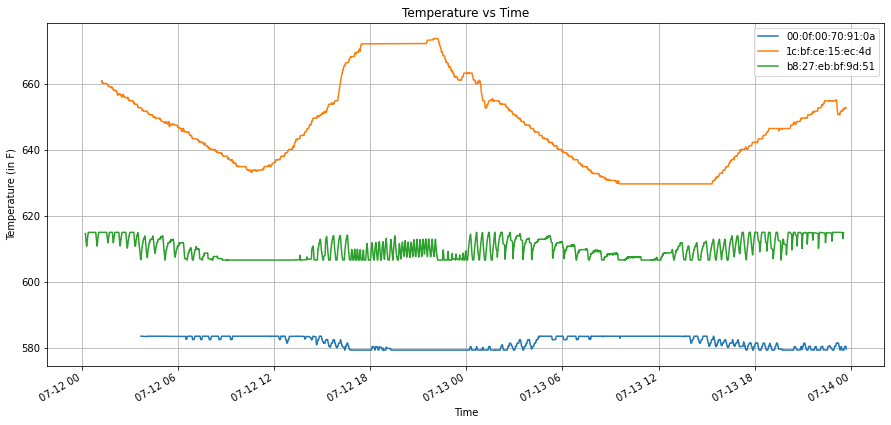

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
for device, group in groups:
    group.mean = group.temp.rolling(window=20).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Temperature vs Time')
plt.xlabel('Time')
plt.ylabel('Temperature (in F)')
plt.show()

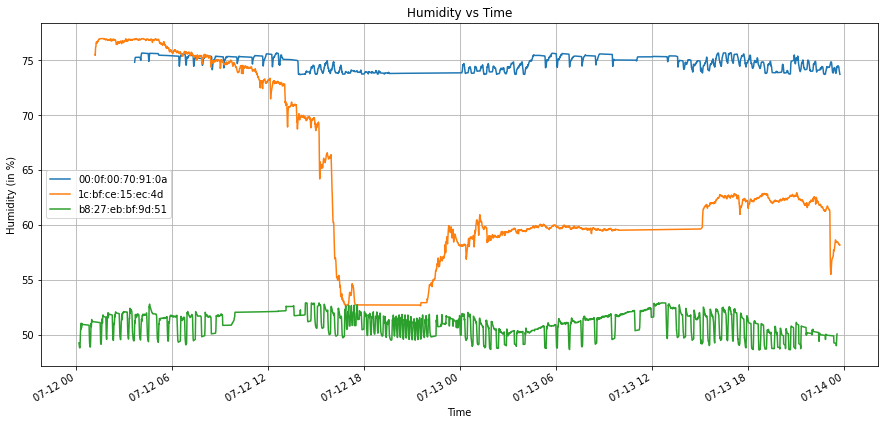

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
for device, group in groups:
    group.mean = group.humidity.rolling(window=20).mean()
    ax.plot(group.mean,
            label=device)
fig.autofmt_xdate()
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Humidity vs Time')
plt.xlabel('Time')
plt.ylabel('Humidity (in %)')
plt.show()

In [175]:
df2['light'] = df2['light'].astype('int32')
df2['motion'] = df2['motion'].astype('int32')

In [176]:
df2

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,0,0.007664,0,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,0,0.006247,0,0.016437,19.200001
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,0,0.008660,0,0.023301,22.200000
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,1,0.007181,0,0.019076,26.600000
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,0,0.006247,0,0.016437,19.200001


In [177]:
dt = datetime(1970, 1, 1)  
df2['datetime'] = df2.ts.apply(lambda x: dt + timedelta(seconds=x))
df2['string_time'] = df2.datetime.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [178]:
df2['ds'] = df2['datetime']
df2['y'] = df2['smoke']

In [179]:
df2

,ts,device,co,humidity,light,lpg,motion,smoke,temp,datetime,string_time,ds,y
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-07-12 00:01:34.385975,2020-07-12 00:01:34,2020-07-12 00:01:34.385975,0.020411
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-07-12 00:01:34.735568,2020-07-12 00:01:34,2020-07-12 00:01:34.735568,0.013275
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-07-12 00:01:38.073573,2020-07-12 00:01:38,2020-07-12 00:01:38.073573,0.020475
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-07-12 00:01:39.589146,2020-07-12 00:01:39,2020-07-12 00:01:39.589146,0.018628
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-07-12 00:01:41.761235,2020-07-12 00:01:41,2020-07-12 00:01:41.761235,0.020448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:33.162015,2020-07-20 00:03:33,2020-07-20 00:03:33.162015,0.016437
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,0,0.008660,0,0.023301,22.200000,2020-07-20 00:03:33.576561,2020-07-20 00:03:33,2020-07-20 00:03:33.576561,0.023301
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,1,0.007181,0,0.019076,26.600000,2020-07-20 00:03:36.167959,2020-07-20 00:03:36,2020-07-20 00:03:36.167959,0.019076
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-07-20 00:03:36.979522,2020-07-20 00:03:36,2020-07-20 00:03:36.979522,0.016437


In [180]:
dict1 = {}
groups = df2.groupby('device')
for i, j in enumerate(groups):
    dict1[i] = j[1]

In [181]:
dict1.items()

dict_items([(0,                   ts             device        co   humidity  light       lpg  \
1       1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000      0  0.005114   
7       1.594512e+09  00:0f:00:70:91:0a  0.002938  76.000000      0  0.005241   
15      1.594512e+09  00:0f:00:70:91:0a  0.002905  75.800003      0  0.005199   
20      1.594512e+09  00:0f:00:70:91:0a  0.002938  75.800003      0  0.005241   
23      1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000      0  0.005114   
...              ...                ...       ...        ...    ...       ...   
405169  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003      0  0.006247   
405172  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.400002      0  0.006247   
405175  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.400002      0  0.006247   
405179  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003      0  0.006247   
405182  1.595203e+09  00:0f:00:70:91:0a  0.003745  75.300003      0  0.006247   

        mot

In [182]:
m = Prophet()
prophet_dict = {}
for i in dict1:
    prophet_dict[i] = m.fit(dict1[i][['ds','y']])
    m = Prophet()

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


15:35:33 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] start processing


15:37:54 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] done processing
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


15:37:58 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] start processing


15:39:39 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] done processing
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


15:39:46 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] start processing


15:43:38 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] done processing


In [183]:
prophet_dict

{0: <prophet.forecaster.Prophet at 0x2261e8934f0>,
 1: <prophet.forecaster.Prophet at 0x2273b1c2460>,
 2: <prophet.forecaster.Prophet at 0x2273dd792e0>}

In [184]:
dict2 = {}
for i in prophet_dict:
    m = prophet_dict[i]
    dict2[i] = m.make_future_dataframe(periods=0, freq='H')

In [185]:
dict2

{0:                                ds
 0      2020-07-12 00:01:34.735568
 1      2020-07-12 00:01:46.869076
 2      2020-07-12 00:02:02.785732
 3      2020-07-12 00:02:11.476376
 4      2020-07-12 00:02:15.289086
 ...                           ...
 111810 2020-07-20 00:03:16.329782
 111811 2020-07-20 00:03:20.684223
 111812 2020-07-20 00:03:25.039890
 111813 2020-07-20 00:03:33.162015
 111814 2020-07-20 00:03:36.979522
 
 [111815 rows x 1 columns],
 1:                                ds
 0      2020-07-12 00:01:39.589146
 1      2020-07-12 00:01:44.468411
 2      2020-07-12 00:01:48.275382
 3      2020-07-12 00:01:55.288543
 4      2020-07-12 00:01:59.098014
 ...                           ...
 105908 2020-07-20 00:03:09.090696
 105909 2020-07-20 00:03:20.460079
 105910 2020-07-20 00:03:24.269880
 105911 2020-07-20 00:03:30.755704
 105912 2020-07-20 00:03:36.167959
 
 [105913 rows x 1 columns],
 2:                                ds
 0      2020-07-12 00:01:34.385975
 1      2020-07-12 00

In [186]:
forecast_dict = {}
for i in dict2:
    m = prophet_dict[i]
    forecast_dict[i] = m.predict(dict2[i])

In [187]:
forecast_dict

{0:                                ds     trend  yhat_lower  yhat_upper  \
 0      2020-07-12 00:01:34.735568  0.007441    0.010936    0.015132   
 1      2020-07-12 00:01:46.869076  0.007444    0.010890    0.015147   
 2      2020-07-12 00:02:02.785732  0.007450    0.011040    0.015275   
 3      2020-07-12 00:02:11.476376  0.007452    0.011031    0.015254   
 4      2020-07-12 00:02:15.289086  0.007454    0.010982    0.015301   
 ...                           ...       ...         ...         ...   
 111810 2020-07-20 00:03:16.329782  0.012035    0.015412    0.019859   
 111811 2020-07-20 00:03:20.684223  0.012035    0.015625    0.019786   
 111812 2020-07-20 00:03:25.039890  0.012035    0.015501    0.019923   
 111813 2020-07-20 00:03:33.162015  0.012035    0.015575    0.019826   
 111814 2020-07-20 00:03:36.979522  0.012035    0.015526    0.019924   
 
         trend_lower  trend_upper  additive_terms  additive_terms_lower  \
 0          0.007441     0.007441        0.005667       

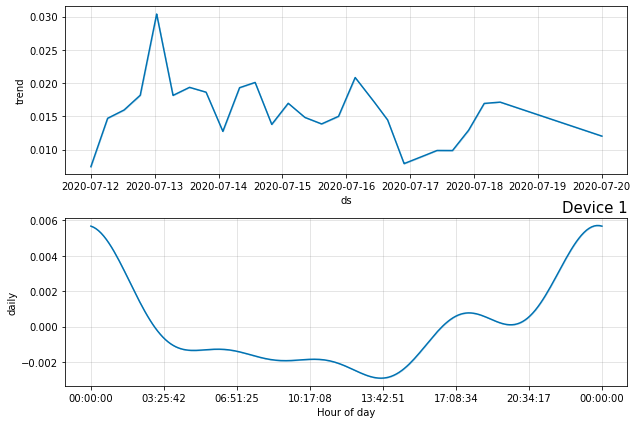

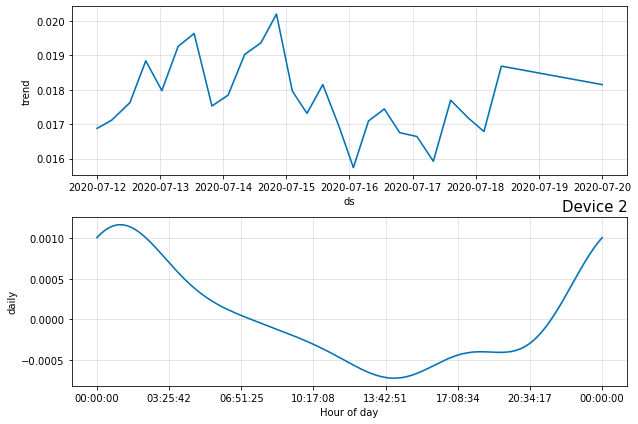

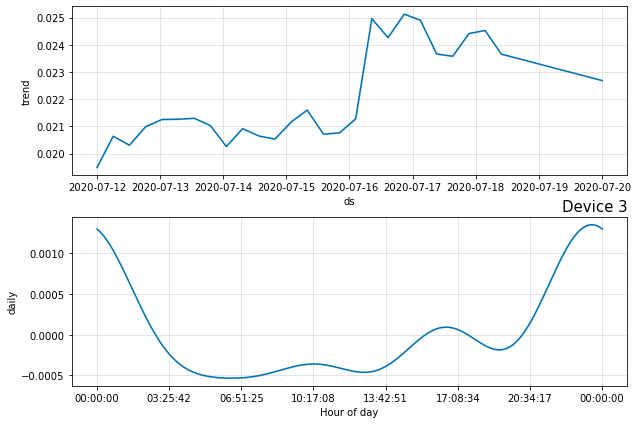

In [188]:
for i in forecast_dict:
    m = prophet_dict[i]
    fig = m.plot_components(forecast_dict[i])
    ax = fig.gca()
    ax.set_title("Device {}".format(i+1), size=15, loc = 'right')

In [189]:
future = m.make_future_dataframe(periods=5, freq='S')
forecast = m.predict(future)

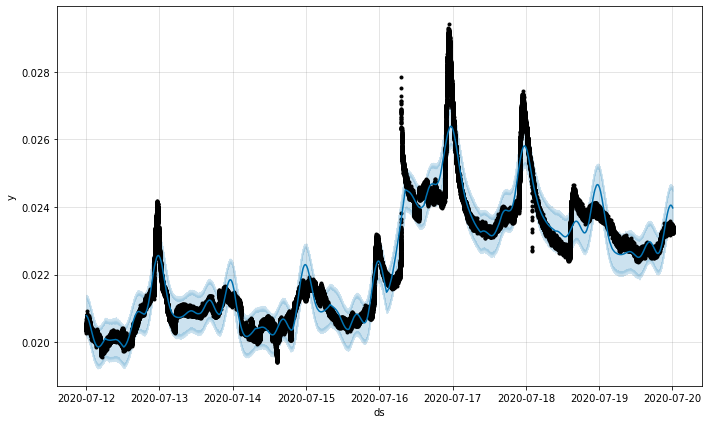

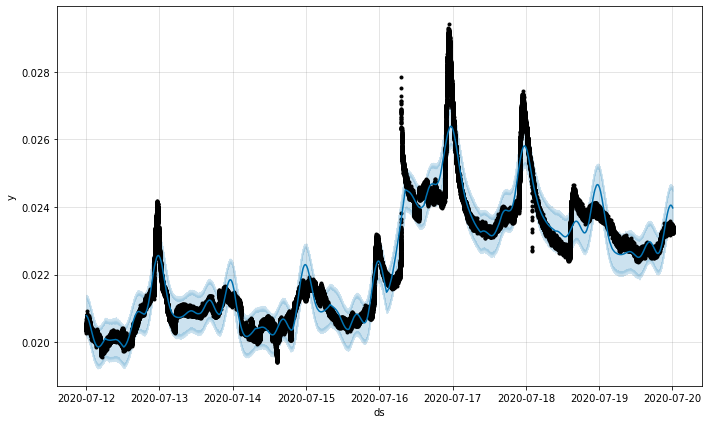

In [190]:
m.plot(forecast)